#CV Assignment 5

Pragya Jaiswal
(MDS202129)


In [79]:
# importing libraries
import cv2, time
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

We define some functions to be used for all questions:

In [80]:
# Display Subplots
def subplts(image, shape, titles, sup_title, axes, figsize, cmap=None):
  fig, ax = plt.subplots(shape[0], shape[1], figsize=figsize)
  try:
    ax = ax.ravel()
  except:
    pass
    
  for i in range(len(image)):
    if cmap is None:
      ax[i].imshow(image[i])
    else:
      ax[i].imshow(image[i], cmap=cmap)

    if axes[i] is None:
      ax[i].set_xticks([])
      ax[i].set_yticks([])

    if titles[i] is not None:
      ax[i].set_title(titles[i])

  if sup_title is not None:
    fig.suptitle(sup_title, fontsize=18)
  plt.show()

# Function to pad image
def pad_img(img, new_shape):
  M,N = img.shape
  new_M, new_N = new_shape
  padded_img = np.zeros((new_M, new_N))
  padded_img[:M,:N] = img
  return padded_img

### Q1


####Part a

Consider the function $f(t) =sin(2πnt)$
, where $n$
 is an integer. Its Fourier transform, $F(m)$
, is purely imaginary. Because the transform, $F(m)$
, of sampled data consists of periodic copies of 
, it follows that 
 will also be purely imaginary. Draw a diagram similar to Fig. 4.6, and answer the following questions based on your diagram (assume that sampling starts at $t=0$
).

(a) What is the period of $f(t)$
?

(b) What is the frequency of $f(t)$
?

(c) What would the sampled function and its Fourier transform look like in general if $f(t)$
 is sampled at a rate higher than the Nyquist rate?

(d) What would the sampled function look like in general if $f(t)$
 is sampled at a rate lower than the Nyquist rate?
 
(e) What would the sampled function look like if $f(t)$
 is sampled at the Nyquist rate, with samples taken at $t= 0, ±ΔT , ±2ΔT , ...$
 ?

***Solution:***

(a) The period is :
$2 πnt = 2π$

$⇒ t = \frac{1}{n}$
 
(b) The frequency would be 1 over the period.

$= \frac{1}{1/n}$

$=n$

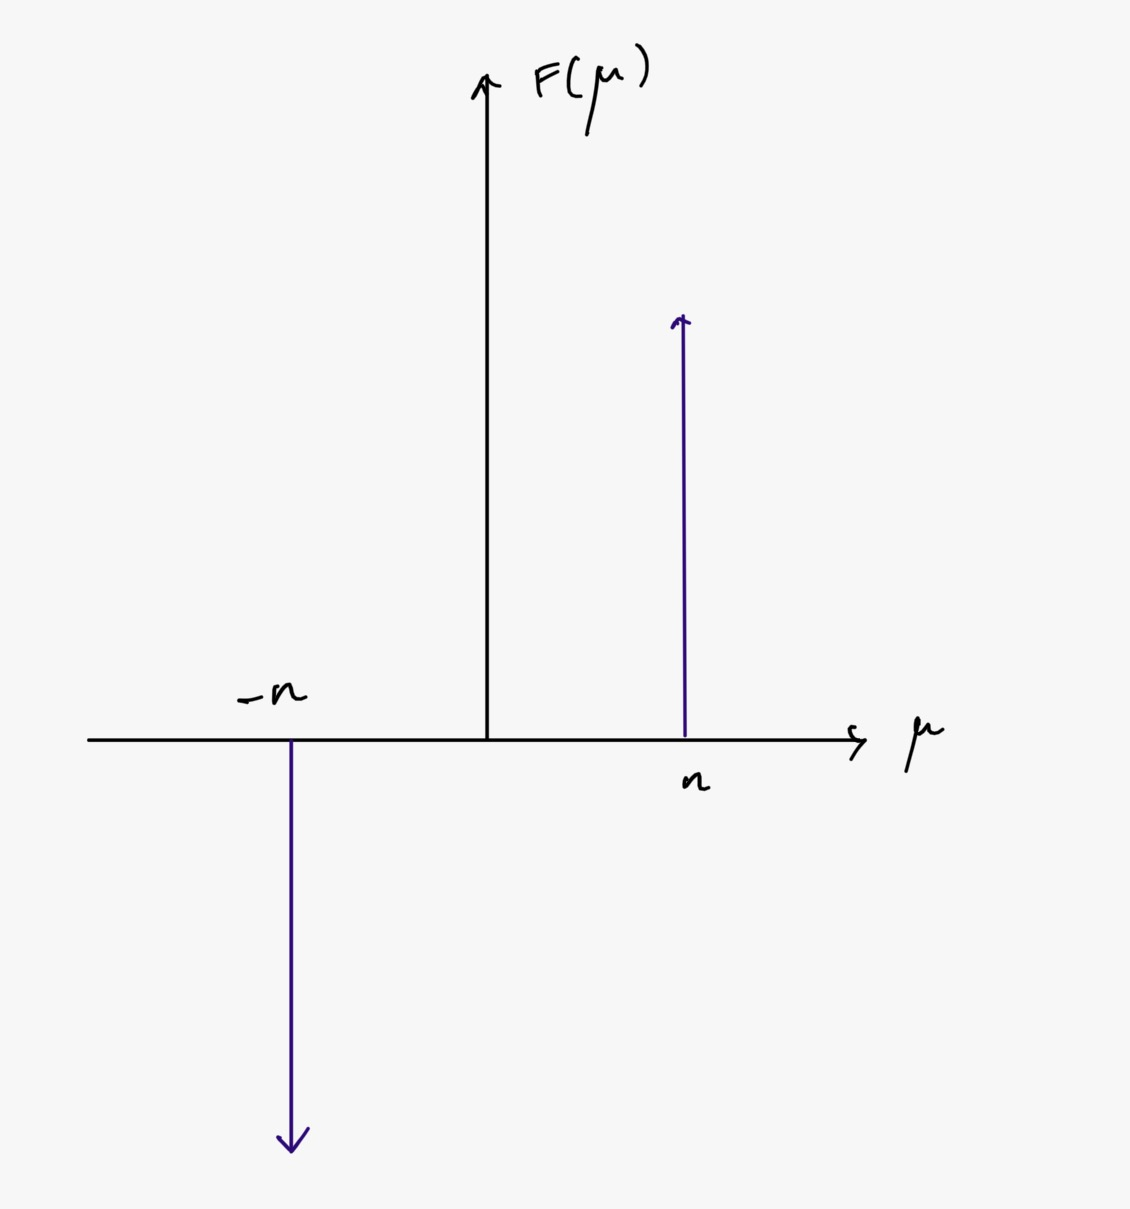

(c) We know that the Nyquist sampling rate is twice the highest frequency which is $n$ here. Hence the Nyquist sampling rate is $2n$. Suppose $f(t)$ is sampled at a rate higher than the Nyquist rate (let the rate be $2n + ϵ, ϵ > 0$ ). In this case the sampled function will behave as $f(t)$ without any significant loss.

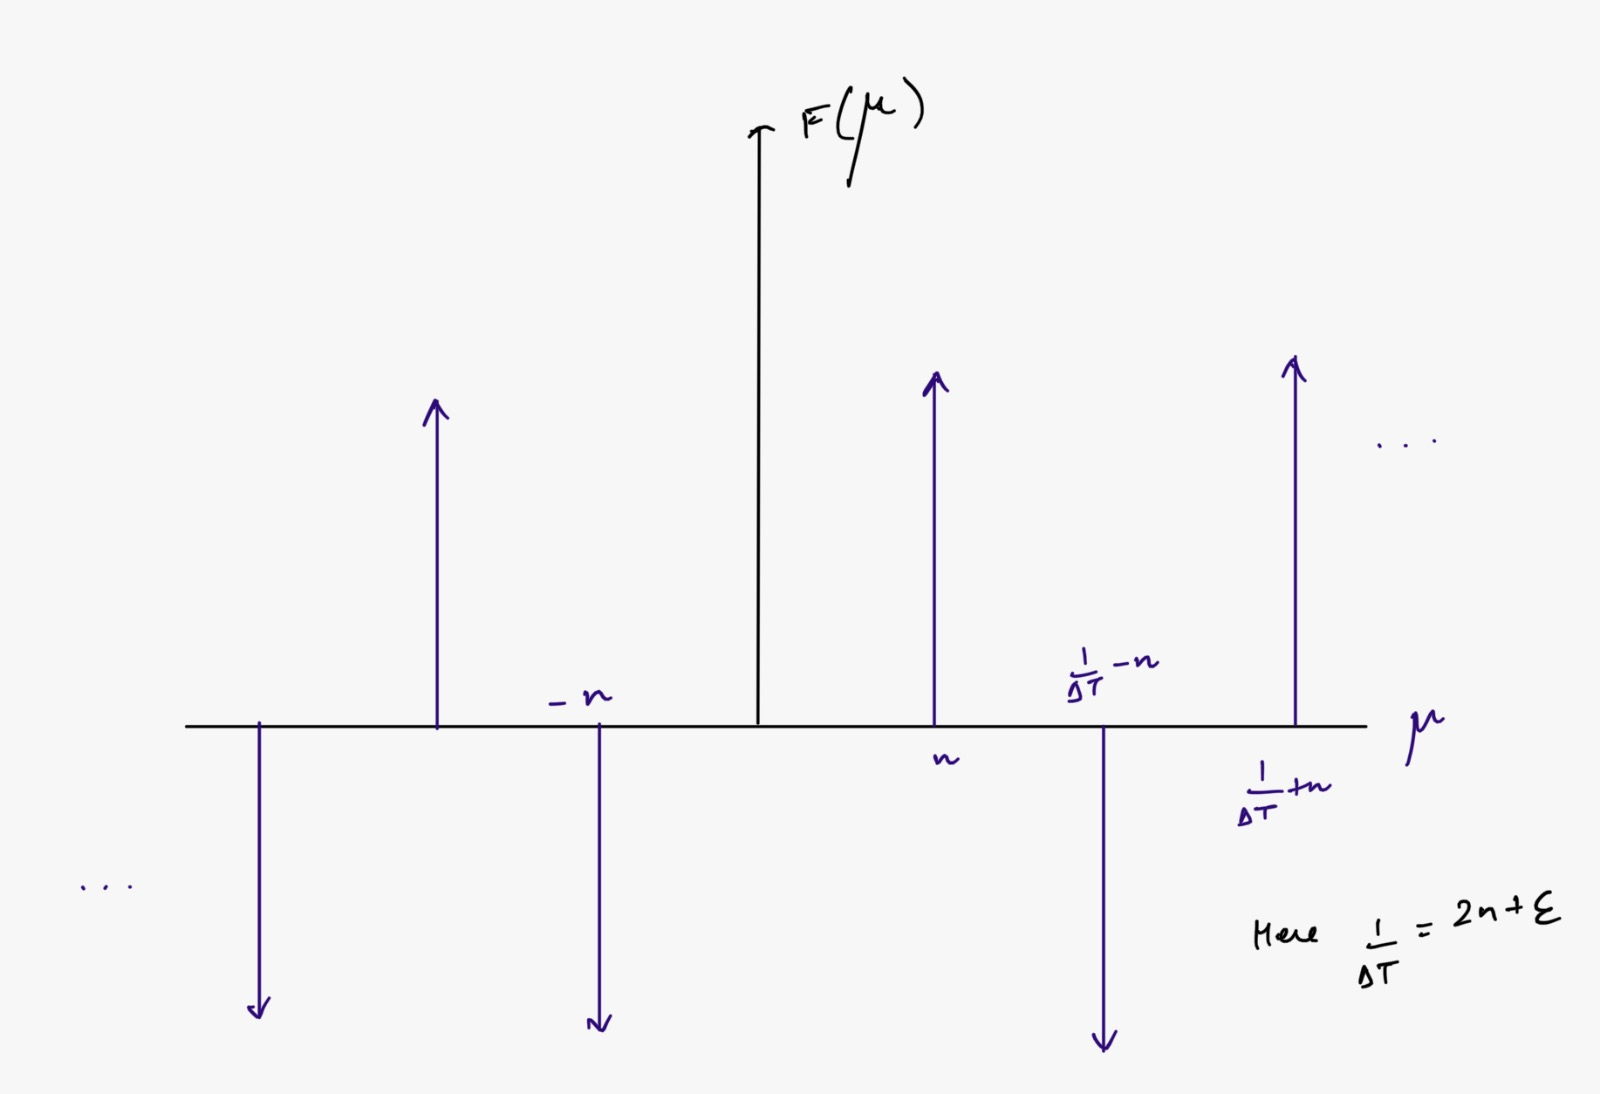

This is an inifnite repititions of the Fourier transform of $f(t) which can be restored when we perform inverse FT as there is no overlap between the copies or repititions.

(d) If $f(t)$
 is sampled at a rate lower than the Nyquist rate, the original function cannot be restored and the resultant function will behave as a combination of two sine functions. Let us assume that the sampling rate is  $2n - ϵ, ϵ > 0$ 
 then the Fourier transform would look like the following:


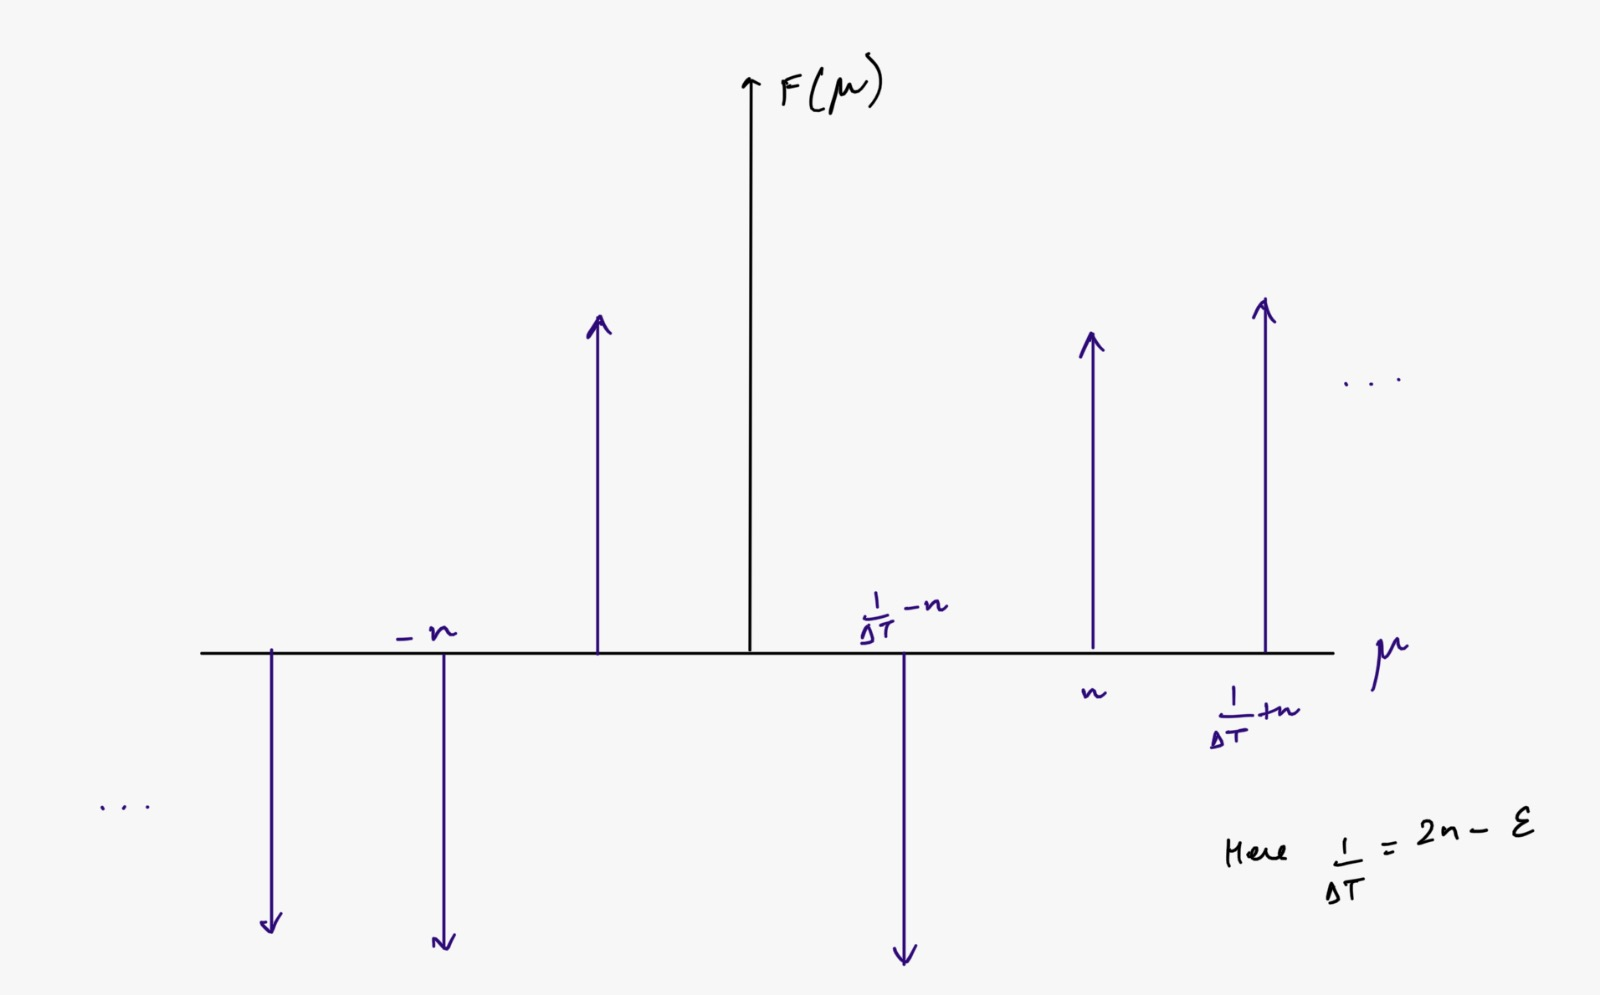

Clearly there is an overlap between the copies and hence when Inverse FT is performed, the function would look similar to a combination of two sine functions instead of the original function.


(e) We know that the Nyquist sampling rate is $2n$ here, i.e., 
 
 $\frac{1}{ΔT} = 2n$

 $⇒ΔT = \frac{1}{2n}$

So if we take samples at  $t= 0, ±ΔT , ±2ΔT , ...$ it would produce the sampled function $sin(2πnΔT)$
 whose values are all $0s$ because $ΔT = \frac{1}{2n}$ and $n$ is an integer.Pictorially, when $ΔT = \frac{1}{2n}$ , all the positive and negative impulses would coincide, thus cancelling each other and producing a result of 0 for the sampled data (which can be observed from the previous diagrams if $ϵ = 0$
)


####Part b

Show that the 1-D convolution theorem given in Eqs. (4-25) and (4-26) also holds for discrete variables, but with the right side of Eq. (4-26) multiplied by $\frac{1}{M}$. That is, show that:

(a) $(f *h)(x) ⇔ (F. H)(u)$

(b) $(f.h)(x) ⇔ \frac{1}{M}(F*H)(u)$

***Solution:***
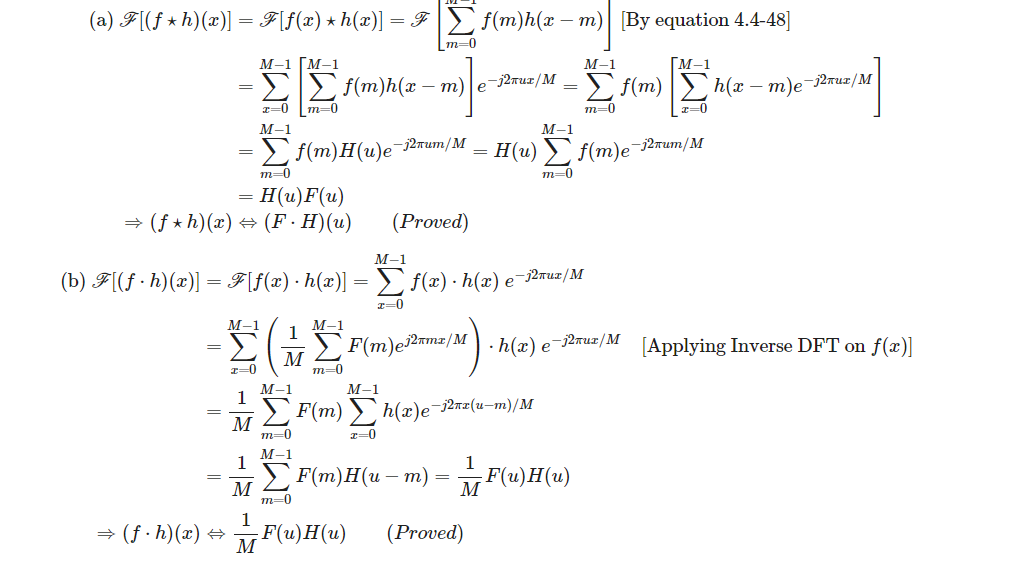

#### Part c

(a) Suppose that the stripes of an image of the same size are four pixels wide. Sketch what the spectrum of the image would look like, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above.

(b) Why are the components of the spectrum limited to the horizontal axis?

(c) What would the spectrum look like for an image of the same size but having stripes that are one pixel wide? Explain the reason for your answer.

(d) Are the dc terms in (a) and (c) the same, or are they different? Explain.

***Solution:***

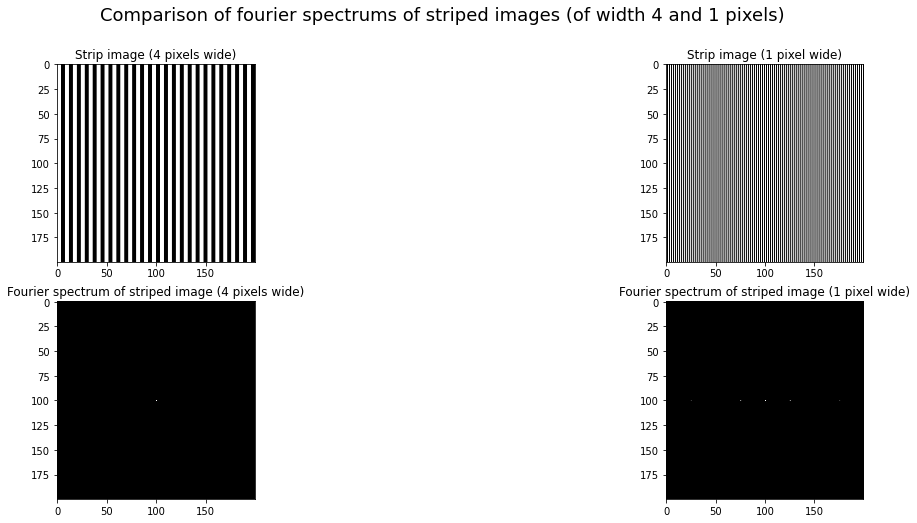

In [81]:
# Function to generate strip images
def strip_img(width=2, shape=(200,200)):
  img = np.zeros(shape)
  M,N = shape
  strip = 'w'

  for i in range(0, N, width):
    if strip == 'b':
      img[:,i:(i+width)]=0
      strip='w'
    else:
      img[:,i:(i+width)]=255
      strip='b'

  return img


# Magnitude spectrums for 4 and 1 pixels

img4pix = strip_img(width = 4)
magnitude_spectrum4pix = np.abs(np.fft.fftshift(np.fft.fft2(img4pix)))

img1pix = strip_img(width = 1)
magnitude_spectrum1pix = np.abs(np.fft.fftshift(np.fft.fft2(img1pix)))

# img2pix = strip_img()
# magnitude_spectrum2pix = np.abs(np.fft.fftshift(np.fft.fft2(img2pix)))

subplts([ img4pix, img1pix, magnitude_spectrum1pix,
                magnitude_spectrum4pix], (2,2),
               ['Strip image (4 pixels wide)',
                'Strip image (1 pixel wide)', 
                'Fourier spectrum of striped image (4 pixels wide)',
                'Fourier spectrum of striped image (1 pixel wide)',],
               'Comparison of fourier spectrums of striped images (of width 4 and 1 pixels)',
               [1]*4, (20,8), cmap='gray')

(a) Subplots at (1,1) and (2,1) are the required striped image (of width 4 pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above

(b) The components of the fourier spectrum are limited only to the x-axis since the intensity of the pixel values change while moving along the x-axis from one pixel to another. The change in frequency along the y-axis is zero.

(c) Subplots at (1,2) and (2,2) are the required striped image (of width 4 pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above

(d) Dc terms in both the images (with width 1 pixel and 4 pixels) are the same since the central dc component is nothing but the average brightness of the image which is essentially the same for both cases.

###Q2

In [82]:
# fetching images
!rm *.jpg *.png
!gdown --id 1wwOQ_mAfQtJLEk5p-xVu-KvAgsYM_LpP
!unzip Filtering.zip

rm: cannot remove '*.png': No such file or directory
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wwOQ_mAfQtJLEk5p-xVu-KvAgsYM_LpP
To: /content/Filtering.zip
100% 360k/360k [00:00<00:00, 118MB/s]
Archive:  Filtering.zip
  inflating: cameraman.jpg           
  inflating: ZebrawithShadow.jpg     
  inflating: ricegrains.jpg          
  inflating: tigerbw.jpg             
  inflating: penguins.jpg            
replace RBCs.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: RBCs.bmp                
  inflating: moon.jpg                


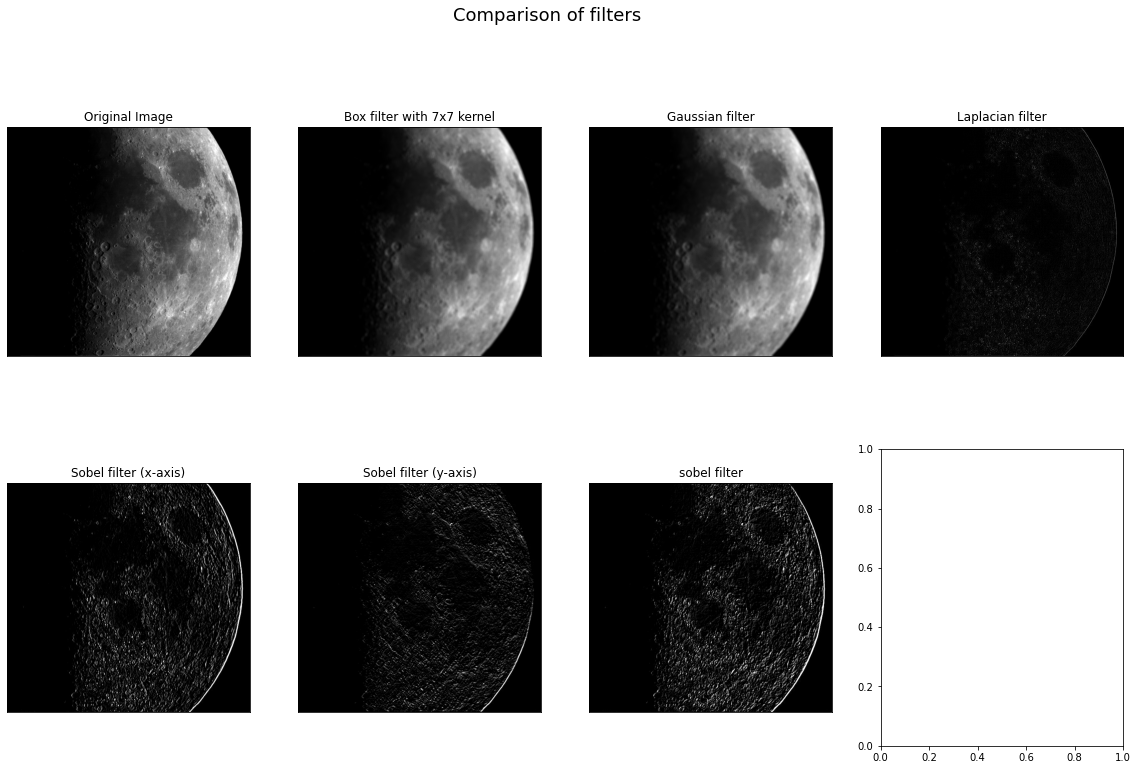

In [83]:
# Reading moon.jpg
img = cv2.imread('moon.jpg', 0)

# Box filter of size 7x7
box = np.ones((7,7))/(7*7)

# Gaussian filter of size 7x7 with sd=10
temp = cv2.getGaussianKernel(7,10)
gauss = temp*temp.T

# laplacian filter
lap = np.array([[0, 1, 0],[1,-4, 1],[0, 1, 0]])

# Sobel in x-direction
sobel_x = cv2.flip(np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]),-1)

# Sobel in y-direction
sobel_y = cv2.flip(np.array([[-1,-2,-1],[0, 0, 0],[1, 2, 1]]),-1)

#combined sobel
sobel = sobel_x + sobel_y

filters = [box, gauss, lap, sobel_x, sobel_y,sobel]
filter_name = ['Original Image','Box filter with 7x7 kernel',
               'Gaussian filter','Laplacian filter', 'Sobel filter (x-axis)', 
               'Sobel filter (y-axis)', 'sobel filter']

# Initializing the array storing the filtered images
filtered_img = [img]

# Applying filters
for i in filters:
  filtered_img.append(cv2.filter2D(img, -1, i))

# Displaying results
subplts(filtered_img, (2,4), filter_name, 'Comparison of filters', [None]*8, (20,12), cmap='gray')


Observations on applying the above filters to moon.jpg :    
* Box Filter(7x7): On applying the box filter, the image gets smoothened, and the sharpness of the features are lost.
* Gaussian Filter: Similar to box filter, on applying Gaussian filter the image is smoothened and sharpness is lost.
* Laplacian Filter: It highlights regions of the image where there is a rapid change in intensity. The edges are detected using this filter and it also amplifies noise in the image. 
* Sobel Filter(x-axis): Sobel Filter is applied in x- axis. It highlights edges and gradients in the image in x direction.
* Sobel Filter(y-axis): Similarly, Sobel Filter is applied in y - axis. It highlights edges and gradients in the image in y direction.
* Sobel Filter: The x and y sobel filtered images are combined to produce this image. As we can observe, the features are sharper and clearer. Edges are detected properly. In case we want to reduce noise, we can do thresholding.

### Q3

In [84]:

# Image with white rectangle of size 25x25 in the middle of 100x100 image
# Function to create image of size 100x100 with a white rectangle at the center
def make_rect(size):
  img = np.zeros((100,100), dtype = np.uint8)
  M,N = img.shape
  c_row = M//2
  c_col = N//2
  rec_m, rec_n = size
  # creating rectangle in the middle
  img[(c_row - (rec_m//2)): (c_row+(rec_m//2)), 
      (c_col - (rec_n//2)): (c_col+(rec_n//2))] = 255
    
  return img

def img_spectrum(rect_size):
  img = make_rect((rect_size,rect_size))
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)

  magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

  magnitude_spectrum = 20 * np.log(1+magnitude_spectrum)
  power_spectrum = np.power(magnitude_spectrum,2) 

  subplts([img, magnitude_spectrum, phase_spectrum, 
                power_spectrum], (1,4), ['Image','Magnitude Spectrum',
                'Phase Spectrum', 'Power Spectrum'], None, [1]*4, (20,8), cmap='gray')


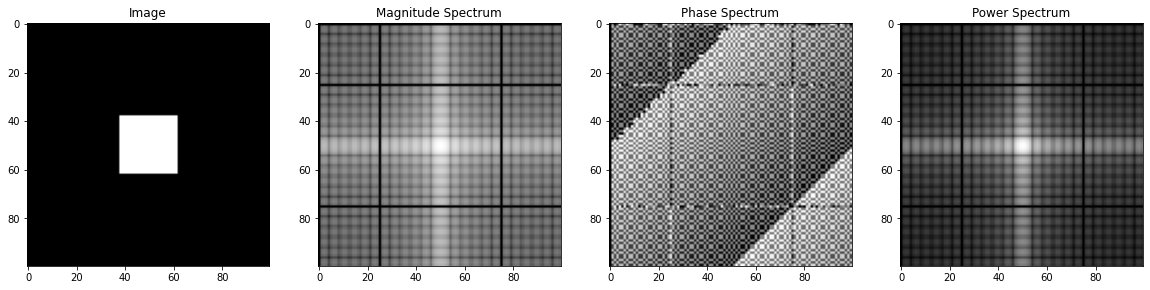

In [85]:
img_spectrum(25)


#### Part (b): 

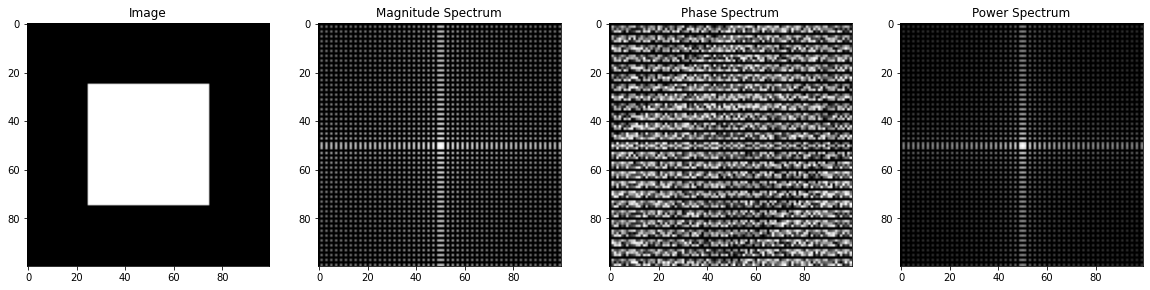

In [86]:
img_spectrum(50)

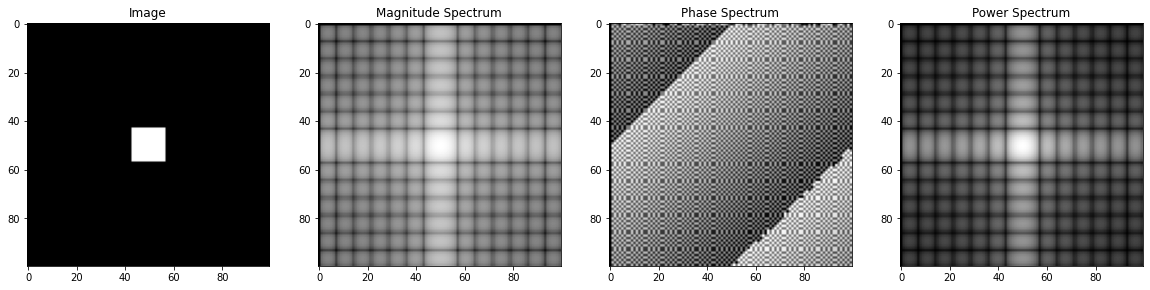

In [87]:
img_spectrum(15)

When the size of the white rectangle increases, the magnitude spectrum will have larger and more concentrated peaks around the center, indicating more low-frequency components in the image. This is because the white rectangle acts as a low-pass filter that preserves the low-frequency components of the image and attenuates the high-frequency components. As a result, the phase spectrum will become more uniform around the center, reflecting the dominant low-frequency content of the image. The power spectrum will also show more energy at low frequencies and less energy at high frequencies, reflecting the filtering effect of the white rectangle.

On the other hand, when the size of the white rectangle decreases, the magnitude spectrum will have smaller and less concentrated peaks around the center, indicating fewer low-frequency components in the image. This is because the white rectangle acts as a high-pass filter that attenuates the low-frequency components of the image and preserves the high-frequency components. As a result, the phase spectrum will become more varied around the center, reflecting the dominant high-frequency content of the image. The power spectrum will also show less energy at low frequencies and more energy at high frequencies, reflecting the filtering effect of the white rectangle.

In summary, the size of the white rectangle affects the distribution of frequency components in the image, which is reflected in the magnitude spectrum, phase spectrum, and power spectrum of the image.

### Q4

#### Part a: Spatial Filtering

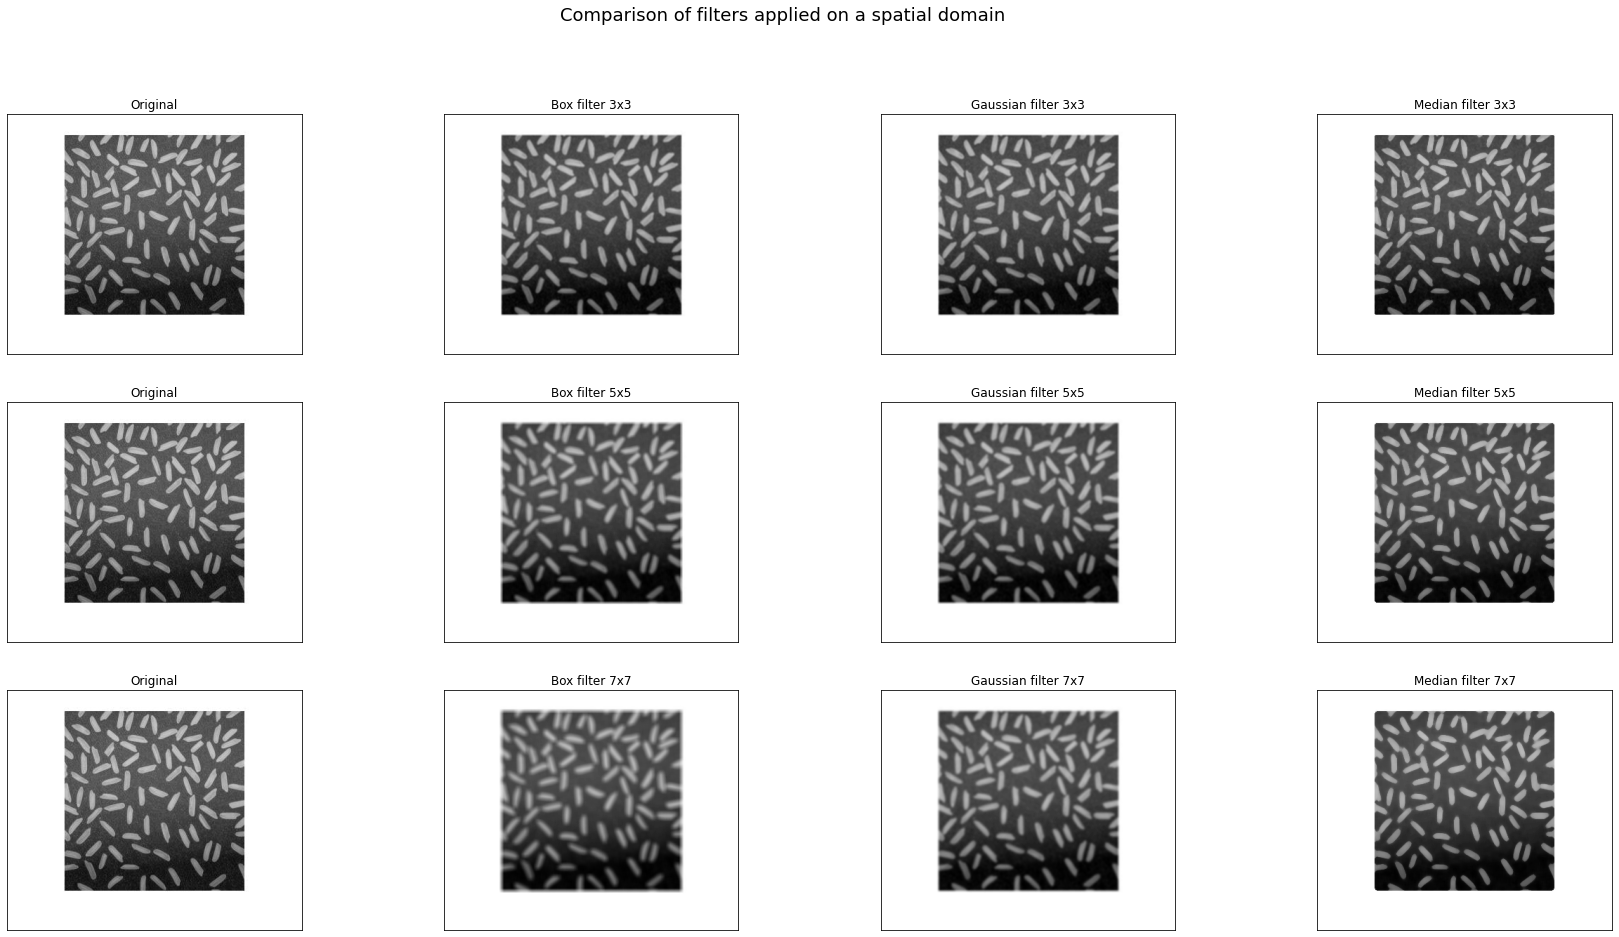

In [88]:
# Reading image ricegrains.jpg
img = cv2.imread('ricegrains.jpg', 0)
# Defining kernel sizes
kernel_sizes = [3,5,7]
images, titles = [],[]

for i in kernel_sizes:
  box = cv2.blur(img , (i,i))
  gaussian = cv2.GaussianBlur(img, (i,i), 1.5)
  median = cv2.medianBlur(img, i)
  images.extend([img, box, gaussian, median])
  titles.extend(['Original', f'Box filter {i}x{i}', 
                 f'Gaussian filter {i}x{i}', f'Median filter {i}x{i}'])
  
subplts(images, (3,4), titles, 'Comparison of filters applied on a spatial domain',
              [None]*12, (30,15), cmap='gray')

#### Part b: Frequency filtering

In [89]:
# Function to apply Butterworth Lowpass Filter to image
def butterworth_lowpass(img, radius, n):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
  
  for i in range(M):
    for j in range(N):
      d = np.sqrt((i-cx)**2 + (j-cy)**2)
      H[i,j] = 1/(1+((d/radius)**(2*n)))
            
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

# Function to apply Gaussian Lowpass Filter on image
def gaussian_lowpass(img, radius):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
    
  for i in range(M):
    for j in range(N):
      d = (i-cx)**2 + (j-cy)**2
      H[i,j] = np.exp(-(d/(2*(radius**2))))
            
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out.astype(np.uint8)

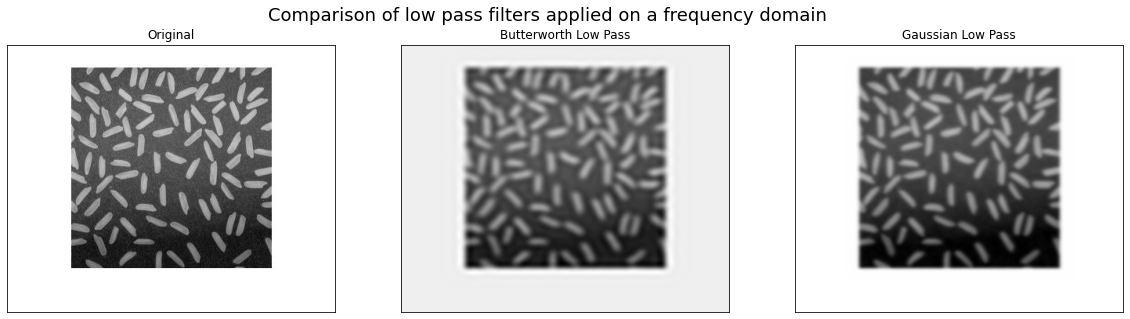

In [90]:
# Reading image ricegrains.jpg
img = cv2.imread('ricegrains.jpg', 0)

# Passing filters over image
butterworth_img = butterworth_lowpass(img, 30, 4)
gauss_img = gaussian_lowpass(img, 30)

# Displaying results
subplts([img, butterworth_img, gauss_img], (1,3), ['Original',
              'Butterworth Low Pass', 'Gaussian Low Pass'],
              'Comparison of low pass filters applied on a frequency domain',
              [None]*3, (20,5), cmap='gray')

###Q5

#### Part a: Spatial Filtering

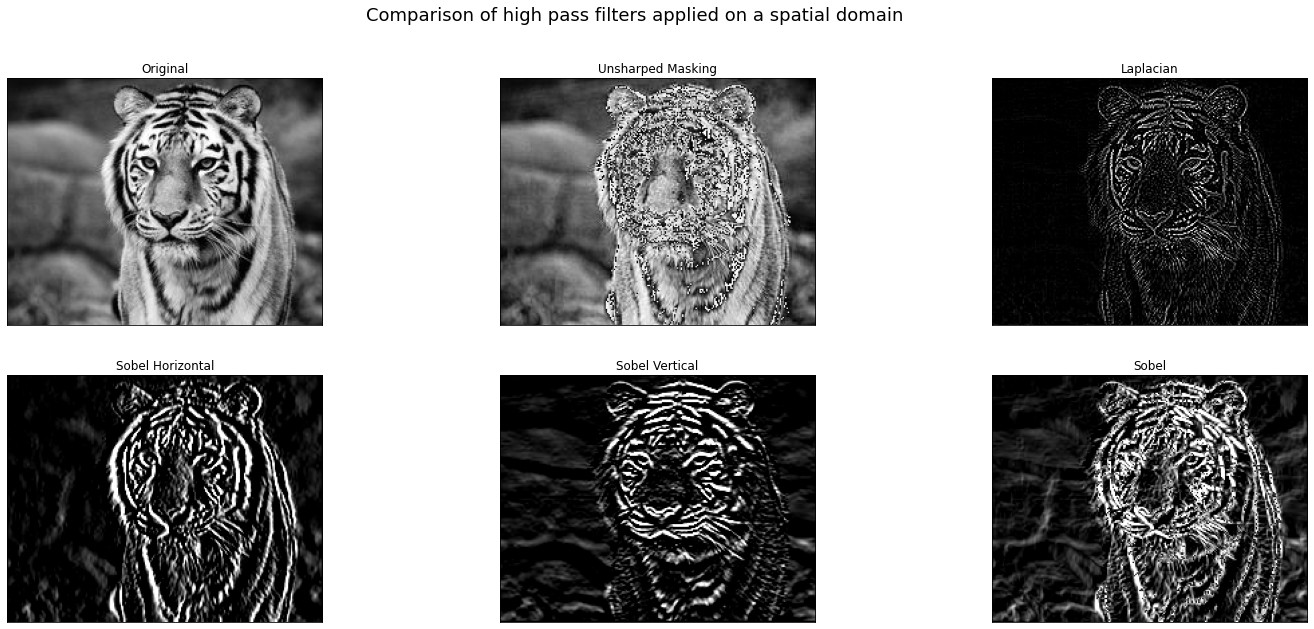

In [91]:
# Reading image tigerbw.jpg
img = cv2.imread('tigerbw.jpg', 0)

# Unsharp Masking
K=1
temp = cv2.getGaussianKernel(5, 10)
gauss = temp * temp.T
blurred_img = cv2.filter2D(img, -1, gauss)
mask = img-blurred_img
unsharped_img = img + K*mask

# Sobel Edge Detector
sob_x = cv2.filter2D(img, -1, sobel_x)
sob_y = cv2.filter2D(img, -1, sobel_y)

sobel = sob_x + sob_y
# Laplace Edge Detector
lap_img = cv2.filter2D(img, -1, lap)

# Displaying results
subplts([img, unsharped_img,  lap_img, sob_x, sob_y, sobel], (2,3),
              ['Original','Unsharped Masking', 'Laplacian', 'Sobel Horizontal',
               'Sobel Vertical', 'Sobel'],
              'Comparison of high pass filters applied on a spatial domain',
              [None]*6, (25,10), cmap='gray')

####Part b: Frequency Domain Filtering

In [92]:
# Function to apply Butterworth Highpass Filter on image
def butterworth_highpass(img, radius, n):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
  
  for i in range(M):
    for j in range(N):
      d = np.sqrt((i-cx)**2 + (j-cy)**2)
      H[i,j] = 1/(1+((d/radius)**(2*n)))
  H = (1 - H)
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

# Function to apply Gaussian Highpass Filter on image
def gaussian_highpass(img, radius):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
  
  for i in range(M):
    for j in range(N):
      d = (i-cx)**2 + (j-cy)**2
      H[i,j] = np.exp(-(d/(2*(radius**2))))
    
  H = 1 - H
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out.astype(np.uint8)

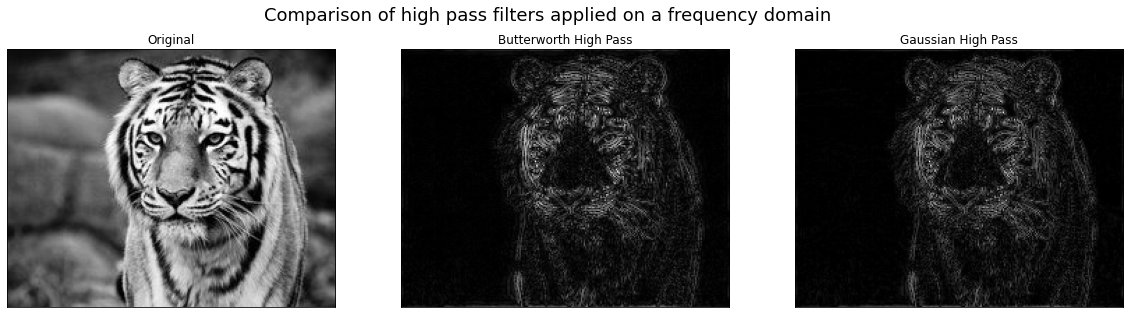

In [93]:
# Reading image tigerbw.jpg
img = cv2.imread('tigerbw.jpg', 0)

# Highpass Butterworth
butter_img = butterworth_highpass(img, 30, 4)

# Highpass Gaussian
gauss_img = gaussian_highpass(img, 30)

# Displaying results
subplts([img, butter_img, gauss_img], (1,3),
              ['Original','Butterworth High Pass', 'Gaussian High Pass'],
              'Comparison of high pass filters applied on a frequency domain',
              [None]*3, (20,5), cmap='gray')

###Q6

####Part a

Time taken = 0.001292 seconds


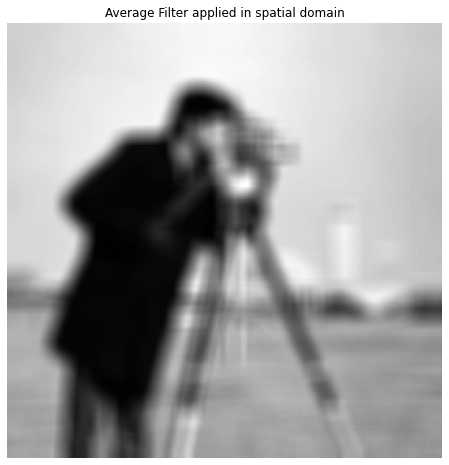

In [95]:
img = cv2.imread('cameraman.jpg',0)

# Define the filter kernel
kernel_size = 11
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

# Apply the filter to the image
start_time = time.time()
avg_filtered_img = cv2.filter2D(img, -1, kernel)
end_time = time.time()
timing_spatial = end_time-start_time

# Display results
print ("Time taken = %f seconds" %(timing_spatial))
plt.imshow(avg_filtered_img, cmap = 'gray')
plt.title("Average Filter applied in spatial domain")
plt.axis('off')
plt.show()

####Part b

Time taken = 0.000950 seconds


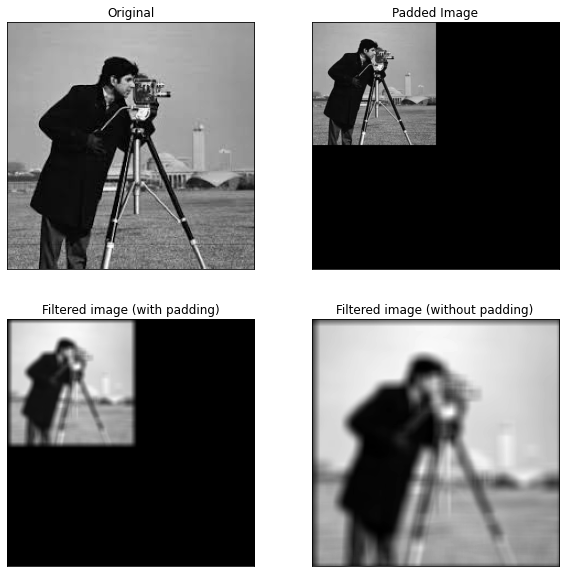

In [96]:
M, N = img.shape
P = 2*M
Q = 2*N

# Padding image and filter
padded_img = pad_img(img, new_shape = (P,Q))
padded_filter = pad_img(kernel, (P,Q))

# Fourier transform of image and kernel
image_fft =  np.fft.fftshift(np.fft.fft2(padded_img))
kernel_fft = np.fft.fftshift(np.fft.fft2(padded_filter))

start_time = time.time()
conv_fourier = np.multiply(image_fft, kernel_fft)
end_time = time.time()
timing_freq = end_time-start_time

transformed_freq = np.abs(np.fft.ifft2(conv_fourier)).astype(np.uint8)
transformed_freq_cut = transformed_freq[3:3+M,3:3+N]

# Display results
print ("Time taken = %f seconds" %(timing_freq))
subplts([img, padded_img, transformed_freq, transformed_freq_cut],
              (2,2),['Original','Padded Image', 'Filtered image (with padding)',
              'Filtered image (without padding)'], None,[None]*4, (10,10),
              cmap='gray')
     

####Part c

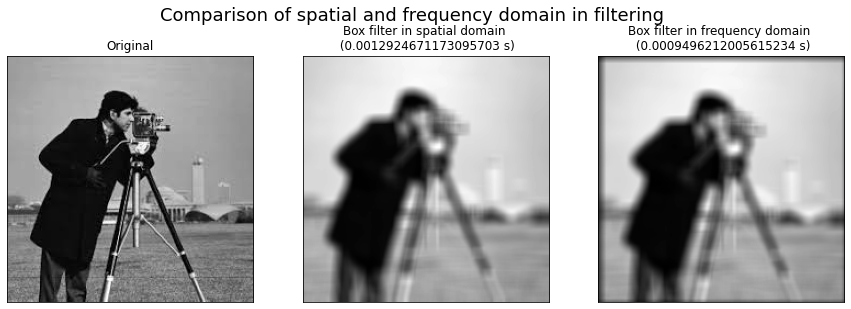

In [97]:
subplts([img, avg_filtered_img , transformed_freq_cut],
              (1,3),['Original',f'Box filter in spatial domain \n ({timing_spatial} s)',
              f'Box filter in frequency domain \n ({timing_freq} s)'],
              'Comparison of spatial and frequency domain in filtering',[None]*3,
              (15,5), cmap='gray')